# Simulated Heart Disease Data

***

## Introduction

One of the leading causes of sickness and mortality among the world's population is heart disease.[1] Heart disease is the top cause of death in the United States, according to the Centers for Disease Control and Prevention (CDC). Heart disease is responsible for almost 1 in every 4 deaths in the United States, and it affects people of all genders, races, and ethnicities.[2]

The most common type of heart disease is known as coronary heart disease. It occurs when the arteries that deleiver blood to the heart become blocked with plaque, which contains cholestrol, causing them to stiffen and narrow and as a result of this the blood supply reduces, and oxygen to heart reduces causing the heart muscle to weaken, increasing the chance of heart failure.[3]

Doctors have tried to forecast heart attacks since they first discovered them. However, because of multiple contributing risk factors such as diabetes, high blood pressure, excessive cholesterol, abnormal pulse rate, and many others, it can be difficult to detect cardiac disease.[1] Machine learning has shown to be useful in assisting in the decision-making and prediction of enormous amounts of data generated by the healthcare industry.[1] I'll be using one of the most widely used datasets, the Cleveland Heart Disease dataset from the UCI Repository, to use Machine Learning algorithms for determining whether a person has heart disease or not.

## Dataset Source
https://www.kaggle.com/ronitf/heart-disease-uci

## About the Dataset
Although there are 76 attributes in this database, all published studies only use a subset of 14 of them.[4]

Details of the dataset attributes are in the table below:[5]

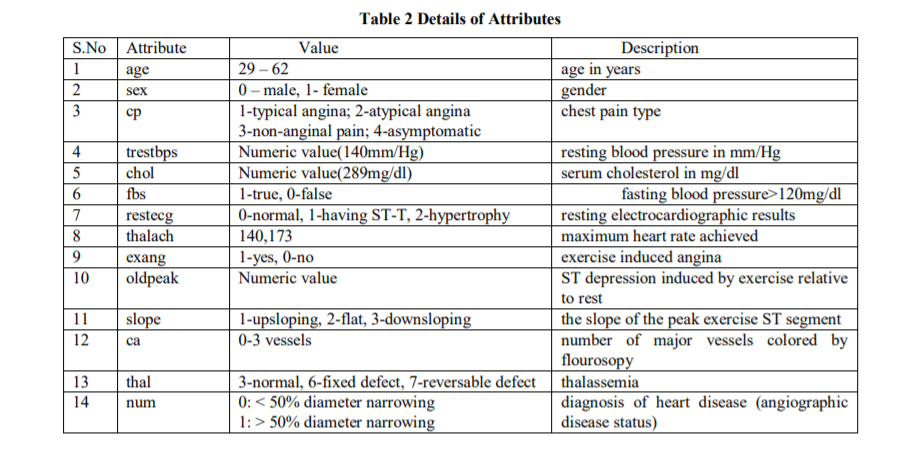

Not all of the characteristics are strongly linked to the prediction. 13 attributes were used (thal, ca, exang, oldpeak, thalach,
cp, slope, sex, age, restecg, trestbps, chol, fbs) to predict heart diseases.[5]



## Exploratory Data Analysis

### Understanding the data and how the different variables correlate together.

#### Age:
Heart failure affects up to one in every five people at some point in their lives and is linked with significant mortality and morbidity. People aged 65 and over bear the majority of the burden of heart failure.[6] After doing analysis using a Pivot table in Excel it would appear that age and heart disease are highly correlated. 

#### Sex:[7]

#### Chest Pain:[8]

Chest pain is divided into four categories. 1. Typical angina 2. atypical angina 3. non-anginal pain 4. asymptomatic.

Angina is chest pain or discomfort caused by a lack of oxygen-rich blood to your heart muscle.

Women may have more of a subtle presentation called atypical angina. https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/

Non-anginal pain or Non-cardiac chest pain (NCCP) is a name for chest pain that resembles heart discomfort (also known as angina) in people who don't have a heart problem.

Asymptomatic heart attacks, also known as silent myocardial infarction (SMI), account for 45-50 percent of cardiac morbidity and even premature mortality in India each year. Males are twice as likely as females to acquire SMI among middle-aged persons. https://www.maxhealthcare.in/blogs/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people#:~:text=Asymptomatic%20heart%20attacks%20medically%20known,develop%20in%20males%20than%20females.

#### Resting Blood Pressure:

High blood pressure (BP) is a major risk factor for cardiovascular disease (CVD), which is the leading cause of death wordwide. High blood pressure is responsible for around 54 percent of strokes and 47 percent of coronary heart disease.[9]

Blood pressure is divided into 4 categories. (Range 110 -180) trestbps[10]
Normal Blood pressure numbers of less than 120/80 mm Hg 
Elevated blood pressure is when readings consistently range from 120-129 systolic and less than 80 mm Hg diastolic. 
Hypertension Stage 1 is when blood pressure consistently ranges from 130-139 systolic or 80-89 mm Hg diastolic. 
Hypertension Stage 2 is when blood pressure consistently ranges at 140/90 mm Hg or higher. 
Hypertensive crisis -This stage of high blood pressure requires medical attention. If your blood pressure readings suddenly exceed 180/120 mm Hg, [10]

High blood pressure, often known as hypertension, is a condition in which the blood pressure is higher than normal. Your blood pressure fluctuates throughout the day depending on what you do. Blood pressure readings that are regularly higher than normal can lead to a diagnosis of high blood pressure (or hypertension) High-cholesterol diet is a common cause of high blood pressure. https://www.cdc.gov/bloodpressure/about.htm#:~:text=High%20blood%20pressure%2C%20also%20called,blood%20pressure%20(or%20hypertension).

If your blood pressure is 140/90mmHg or above (or 150/90mmHg or higher if you're over 80), you have high blood pressure.
The optimal blood pressure range is usually between 90/60mmHg and 120/80mmHg.
If you don't take actions to keep your blood pressure under control, readings between 120/80mmHg and 140/90mmHg could suggest you're at danger of having high blood pressure. https://www.nhs.uk/conditions/high-blood-pressure-hypertension/


#### Cholesterol

The liver manufactures cholesterol and transports it throughout the body to be used in the creation of hormones and cell membranes. Low-density lipoproteins (LDL), also known as "bad cholesterol," are formed as cholesterol is carried through the bloodstream. Although LDL is required in small amounts (LDL transports cholesterol to various parts of the body), a high LDL cholesterol level increases the risk of a heart attack significantly.[11] You can get fatty deposits in your blood vessels if you have high cholesterol. These deposits eventually accumulate to the point where blood flow through your arteries is restricted. Those deposits can sometimes rupture and form a clot, resulting in a heart attack or stroke. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke. When total cholesterol levels reach 240 mg/dl or above, the risk of cardiovascular disease rapidly increases. A good cholestrol level is less than 200 mg/dl total cholesterol.
There's a sharp increase in the risk for cardiovascular disease when total cholesterol levels are 240 mg/dl and above. Goals: Total cholesterol less than 200 mg/dl.https://my.clevelandclinic.org/health/articles/17385-cardiovascular-disease-prevention--reversal#:~:text=There's%20a%20sharp%20increase%20in,heart%20or%20blood%20vessel%20disease.

Mortality from stroke is lowest when cholesterol levels are between 180 and 200. Below 180, mortality skyrockets, and above 240, mortality skyrockets. Death rates are highest below 160 and highest above 300. https://www.westonaprice.org/health-topics/know-your-fats/cholesterol-and-stroke/

High cholesterol and heart disease are more common in males 45 and women 55 years old. https://www.webmd.com/cholesterol-management/high-cholesterol-risk-factors#:~:text=Age%3A%20Your%20risk%20may%20increase,high%20cholesterol%20and%20heart%20disease.

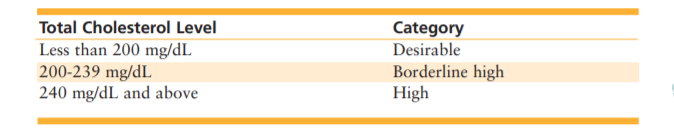  https://www.nhlbi.nih.gov/files/docs/public/heart/wyntk.pdf


#### Fasting Blood Pressure

Insulin is a hormone produced by the pancreas that aids in the conversion of glucose to energy. The carbohydrates in your diet are turned into glucose, often known as blood sugar, after you eat a meal. Your pancreas can still create insulin in type 2 diabetes, but that insulin becomes less effective at transporting glucose into your cells. https://www.endocrineweb.com/conditions/pre-diabetes/pre-diabetes

Diabetes patients are more than twice as likely to die from heart disease or have a stroke. While all diabetics have an elevated risk of heart disease, type 2 diabetes patients are more likely to acquire the condition. https://www.webmd.com/diabetes/heart-blood-disease#:~:text=In%20general%2C%20the%20risk%20of,those%20with%20type%202%20diabetes.

Fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.
[12]
Researchers believe they've figured out why males are more likely than women to develop type 2 diabetes: they're genetically predisposed to it. According to the findings of the study, men need to acquire considerably less weight than women to develop the illness. https://www.bbc.com/news/health-15147999

#### Resting ECG

A resting ECG differs from a stress or activity ECG, as well as a cardiac imaging exam. If you have risk factors for heart disease, such as high blood pressure, or symptoms like palpitations or chest pain, you may need an ECG test.[13]

#### Maximum heart rate achieved

The maximum rate is calculated by subtracting your age from 220. The maximum heart rate for a 50-year-old is 220 minus 50, or 170 beats per minute. Your aim would be 50 percent of that maximum, or 85 beats per minute, at a 50 percent exercise level. Your goal heart rate would be 145 beats per minute at an exercise level of 85 percent. As a result, a 50-year-ideal old's heart rate during activity should be between 85 and 145 beats per minute.[14]

#### Exercise Induced Angina

Angina is chest pain that occurs as a result of exercise, stress, or other factors that cause the heart to pump harder. It's a very prevalent sign of coronary artery disease, which is caused by clogged coronary arteries with cholesterol. This is the artery network that feeds the heart muscle.[15]

####

####

####

#### Thalassemia

Thalassemia is a genetic blood condition in which your body produces much less hemoglobin than it should. Hemoglobin is a protein that allows red blood cells to transport oxygen. Thalassemia can induce anemia, which might make you tired. Severe anemia can cause organ damage and even death.[19]

### Libraries

In [1]:
import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib.dates as mdates


### Data

In [2]:
# Load the Health dataset csv file to a pandas dataframe
heart_data = pd.read_csv("HealthData.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
# Identify missing values in each column
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Statisical Information about the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Types

Individual data points can be classed as belonging to one of several statistical data categories in statistics, such as categorical data ("red", "blue", "green")[20] The data type determines which types of probability distributions can logically be used to represent the variable, the operations that can be performed on the variable, the type of regression analysis that can be used to predict the variable, and so on.[20]
The concept of data type is comparable to that of measurement level, however it is more specific: Count data, for example, require a different distribution (e.g., a Poisson or binomial distribution) than non-negative real-valued data, but both are measured at the same level (a ratio scale).[20]

### Level of Measurement
The nature of information within the values assigned to variables is described by the level of measurement or scale of measure, which is a categorization. [21] Stanley Smith Stevens, a psychologist, created the most well-known classification with four levels of measurement, or scales: nominal, ordinal, interval, and ratio.[21]

The table below categorizes the many simple data types, as well as their associated distributions, permitted operations, and so on. Because the theory of random variables typically explicitly assumes that they hold real numbers, all of these data types are generally coded using real numbers.[20]

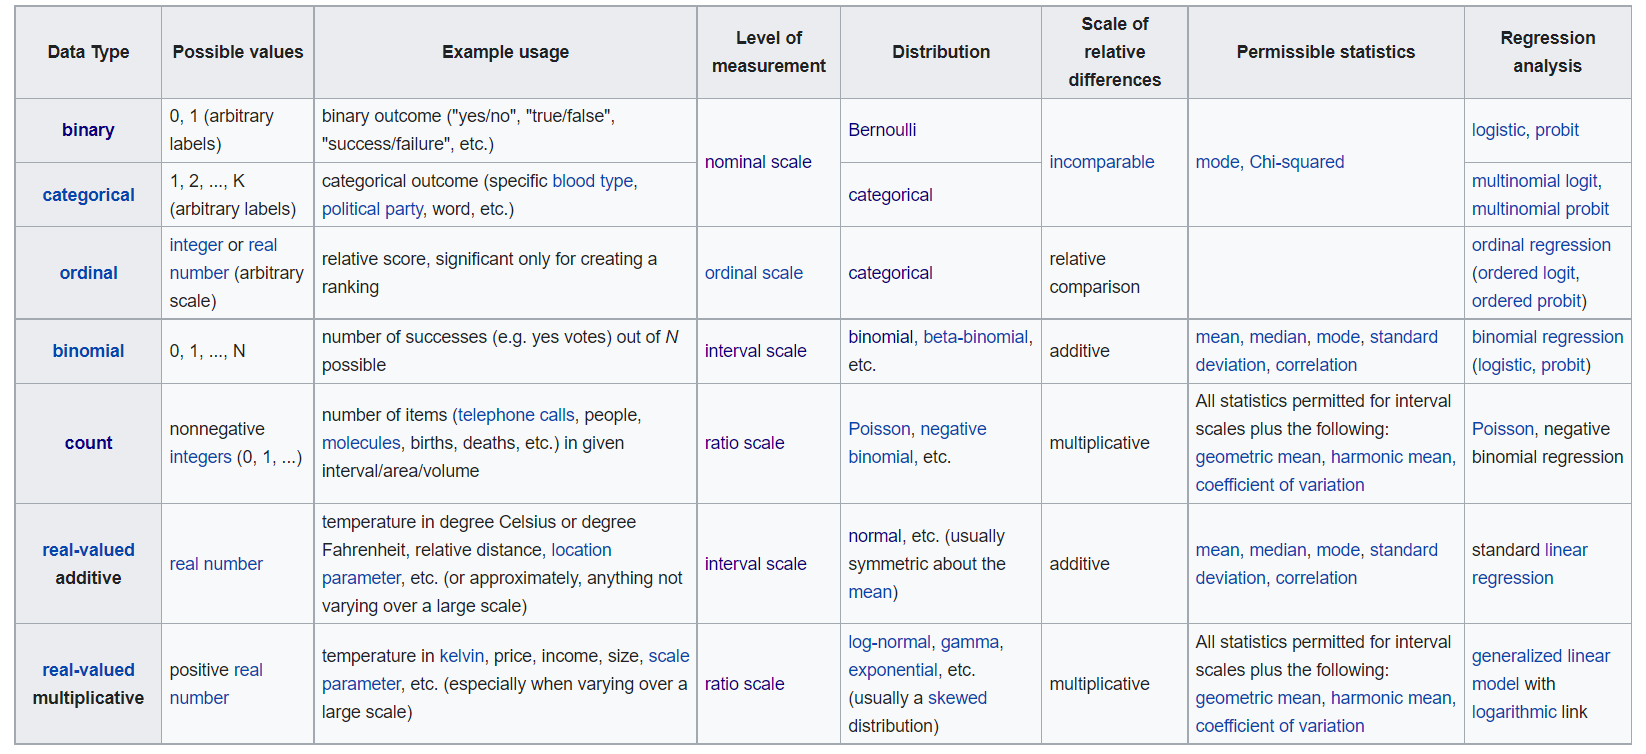

### Age
Age is a count data type. Count data is statistical data in which the observations can only take the counting numbers, non-negative integer values 0 through 1, 2, 3, and so on, and where the integers come from counting rather than ranking.[22] A count variable is a term used to describe a single item of count data. The Poisson, binomial, and negative binomial distributions are often employed to illustrate the distribution of such a variable when it is handled as a random variable.[22]It has a ratio scale. The ratio type is named by the fact that measurement is the estimation of the ratio between a continuous quantity's magnitude and a unit of measurement of the same sort. Mass, length, duration, plane angle, energy, and electric charge are some examples. Ratios, unlike interval scales, can be compared by division. Many ratio scales can be loosely defined as indicating "how much" of something (i.e. an amount or magnitude). When expressing an order of magnitude, such as temperature in Orders of magnitude, a ratio scale is frequently employed.[23] The most typical ratio scale variables are age, money, and weight. For instance, if you are 50 years old and your child is 25, you may confidently declare that you are twice their age. Understanding the various measurement scales allows you to see the various types of data you can collect.[24]

#### Normal Distribution 

    numpy.random.normal
    
This function uses normal distribution, otherwise known as a bell curve, to select samples. 
The probability density function of the normal distribution was initially computed by De Moivre and later by both Gauss and Laplaceis. Its commonly referred as the bell curve because of its shape.[25]

In nature normal distributions are common. It represents for example the observed distribution of samples altered by 
by a large number of small random disturbances, each having its own unique distribution.

A normal (or Gaussian, Gauss, or Laplace–Gauss) distribution is a type of continuous probability distribution for 
a real-valued random variable in probability theory. The probability density function uses the following formula.[25]

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

The parameter mu represents the distribution's mean or expectation, whereas sigma represents its standard deviation. 
The distribution's variance is v. A normal deviate is a random variable that has a Gaussian distribution and is normally distributed.[26]

[60.6351032  43.23158964 62.56407389 38.95859215 63.04350206 60.19870752
 57.11931745 44.6469167  67.79103138 70.97537525 62.89098111 53.15347379
 60.18991413 65.54491406 58.44379631 59.82762348 55.10124355 56.41453499
 49.02894479 51.18084995 40.35438919 59.5559901  56.76369371 66.34645454
 58.30681146 50.44306062 61.85736539 70.98332425 45.57248923 53.19720032
 62.80142089 42.96259777 59.04589811 41.14272029 57.97554725 49.59923621
 50.51784544 38.54143021 70.56512553 60.40065921 64.04241399 59.12657768
 64.22957295 56.0591021  72.48521633 44.68264416 47.39305665 48.22727377
 45.98965618 49.85281378 70.21918247 43.07542332 55.21145761 53.76034142
 72.04829978 43.00387997 50.12526774 52.36795279 60.15223049 66.88955123
 51.10992834 41.7260357  77.53750123 59.2042485  45.08374606 55.20124506
 55.92697548 68.55792158 65.21525661 62.12651878 46.89429948 45.22370895
 45.79146467 47.57988442 64.37770428 50.87275217 54.96231732 54.00767684
 66.18889408 44.002942   51.98809763 46.17548927 37

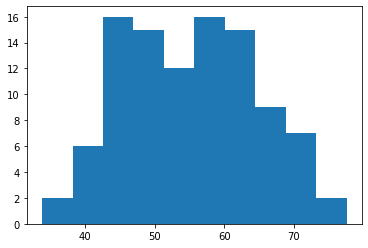

In [7]:
#Age - Normal Distribution

mu, sigma = 55, 10 # mean and standard deviation

s = np.random.normal(mu, sigma, 100)
s
print(s)
# Displaying Data
plt.hist(s)
plt.show()


###### *This is an example graph of Normal Distribution where we can see the data is dispersed from the median and has the shape of a bell curve*

### Sex
Sex is a binary data type as the output is either 'Yes' or 'No', that is, male or female.[27] It has a nominal scale. The nominal type distinguishes items or topics solely on the basis of their names, (meta-)categories, and other qualitative classifications to which they belong. The variables may be represented by numbers, but the numbers have no numerical value or relationship: for example, a globally unique identity.[27] A binary variable is a sort of random variable that has two possible values. A binomial distribution is used to describe the total counts of binary variables, or variables that are coded as 1 or 0.[27] 

#### Binominal Distribution

The discrete probability distribution of the number of successes in a series of n independent experiments, each asking a yes–no question and each with its own Boolean-valued conclusion, is the binomial distribution with parameters n and p.[28]

    numpy.random.binomial(n, p, size=None)

This function uses binomial distribution to select samples. Samples are taken from a bionomial distributuion with given parameters. n means number of trials/atttempts, p represents probability of succcess, and n must be an integer and greater or equal to 0. p must be in the interval of 0 to 1 [29]



[7 4 4 6 6 4 7 5 5 4 7 4 6 3 5 8 2 5 2 4 5 5 4 4 4 3 6 8 6 6 5 7 6 3 4 6 7
 4 4 3 4 4 5 5 5 4 8 7 5 5 2 9 4 3 6 4 6 0 5 5 1 3 5 3 3 3 8 3 3 4 7 6 6 5
 3 3 5 4 2 4 4 6 5 5 3 6 5 3 4 5 6 3 4 3 9 4 5 5 3 4]


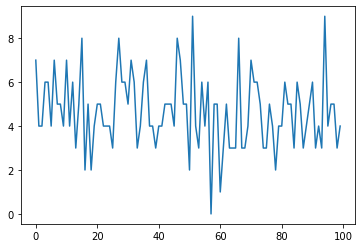

In [8]:
#Sex - Binominal Distribution

n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100)
print (s)

# Displaying Data
plt.plot(s)
plt.show()


In [9]:
###### *This a graph....*

### Chest Pain Type 

Chest Pain Type is a categorical data type. A categorical variable, also known as a qualitative variable, in statistics is a variable that has a finite number of possible values, allocating each human or other unit of observation to a specific group or nominal category based on some qualitative attribute. [30]  A categorical distribution is the probability distribution associated with a random categorical variable. When it comes to data analysis, the word "categorical data" refers to data sets that contain both categorical and non-categorical variables.[30] Similiar to the sex variable , it has a nominal scale. Numbers may be used to represent variables, but they have no numerical value or relationship.

#### Probability Distribution

A probability distribution will return a number based on the relative weights for a number chosen at random. For example, a number chosen from the range [1, 2] with relative weights of [.9,.1] has a 90% chance of being 1 and a 10% chance of being 2.[31] To pick a random number from a population????? depending on the probability distribution weights?????, use random.choices(population, weights). The weights are relative, which means that the percentage of each number chosen is determined by the sum of the weights.[31] random.choices() is used to select a random number

In [10]:
from random import choices
population = [1, 2, 3, 4, 5, 6]
weights = [0.1, 0.05, 0.05, 0.2, 0.4, 0.2]

choices(population, weights)

[6]

## Cholesterol

Like the age varibale, cholesterol is a Count Data Type and it has a ratio scale.        [22]



#### Poisson Distribution

In probability theory and statistics, the Poisson distribution (/ˈpwɑːsɒn/; French pronunciation:named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified interbvals such as distance, area or volume. [32]

For instance, a call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely and there is a small probability of it being as low as zero and a very small probability it could be 10. Another example is the number of decay events that occur from a radioactive source during a defined observation period.

#### Diagnosis of Heart Disease 

num is a binary data Type - WHAT TYPE OF DISTRIBUTION????

num is the target variable



# Identify the Distribution of the Target Variable

165 people have a heart defect (1) and 138 people have a healthy heart (0). These results almost have an equal distribution between the two classes. 

In [11]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
# Splitting the features and target

The target variable is split from all the other variables, to predict an outcome as to whether people will have a heart defect or not. All the variables such as age, chest pain etc are used to determine what the target will be. The target variable is removed from the dataframe and stored elsewhere. Two variables are created. All the features are stored in variable X (the target column is dropped from this variabel) and the target is stored in variable Y

In [13]:
X = heart_data.drop(columns='target', axis=1)

Y = heart_data['target']

In [14]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Split data into training and test data

Four variables are created - X_train, X_test, Y-train, Y_test.  The X and Y variables are both split into X and Y test and train data. Test size is the % of the test data required in this case 20% of the data. Stratify=Y distributes the values 0 and 1 evenly. 
The mean values change, that is, the data is split each time the mean function is run. To prevent this, and get the same split each time, the parameter Random State is used to specify the random state instance.

It returns the number of data points in each array. X.shape is the original data. Training data is 80% and test data is 20%

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state = 2) 

print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


#### "Simulating data is a  method that uses statistical techniques to combine results from different studies and obtain a quantitative estimate of the overall effect of a particular intervention or variable on a defined outcome—i.e., it is a statistical process for pooling data from many clinical trials to glean a clear answer."

#### Types of data and effect measures

Identifying the data type for the outcome measurements is a critical first step in analyzing the outcomes of effectiveness studies. There are 5 possibel outcomes. [33]
1.data that is dichotomous (or binary), whereby each individual's outcome is one of just two categorical outcomes.
2.Continuous data involves each individual's outcome being a numerical quantity measurement.
3.ordinal data (including measurement scales), in which each person's outcome is one of several ordered categories, or derived by scoring and summing categorical replies;
4.counts and rates calculated from counting the number of events experienced by each individual

We examine the definitions, attributes, and interpretation of standard measures of intervention impact for each of the above types of data, as well as recommendations on how effect estimates can be generated from data likely to be provided in sources such as journal articles.

#### Effect Measures:

We refer to statistical constructs that compare outcome data between two intervention groups as effect measures. Probabilities ratios (which compare the odds of an event between two groups) and mean differences are two examples (which compare mean values between two groups). Ratio measurements and difference measures are two types of effect measures (sometimes also called relative and absolute measures, respectively). The odds ratio, for example, is a ratio measure, while the mean differences is a difference measure.

Before being analyzed, the values of ratio measures of intervention effect are frequently log transformed, and they are sometimes referred to in terms of their log transformed values (e.g. log odds ratio). The natural log transformation (log base e, abbreviated as 'ln') is commonly employed.

In randomized trials, one of the most fundamental principles is that the analysis must take into consideration the amount of randomization. In most cases, the number of observations in the analysis should equal the number of randomized 'units.'

Prepare, Interpret. Compare, Output PICO

#### Statistical Hypothesis

Scipy is used to carry out hypothesis tests. Initially, it is assumed that there is a null hypothsis, that is, there is nothing of interest in the sample data. However, an alternative hypothesis can be accepted meaning that the data is drawn from a distribution that is different to it. To begin a statisical text, data such as a sex distribution is needed to compare against something. Then sample data such as cholesterl can be used to compare to sex. There is a probabilty threshold that determines when you reject the null hypothsis - p values. 

In [16]:
 heart_data['chol'].mean()

246.26402640264027

#### Training Dataheart_data = datasets.load_heart_data()
X = heart_data.data
Y =  heart_data.target

Simulated data is used to increase the size in training data or to introduce changes in the data that the model can handle in the future. The train, test, split function comes under the Sklearn selction package. Data is split so there is testing and trained data.  The model creates a line to get both sides classified correctly. An input X is required, for example Sex, and an output Y is needed, for example Cholestrol. The way the data is split has an impact on the accuracy acheived from the model.

In [17]:
heart_data = datasets.load_heart_data()
X = heart_data.data
Y =  heart_data.target

AttributeError: module 'sklearn.datasets' has no attribute 'load_heart_data'

In [ ]:
# Display Data
print(x[:5])
print(x.shape)
print(y[:5])
print(y.shape)

In [ ]:
# Split Data
x_train, X_test, Y-train, Y_test = train_test_split(X,Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train.shape)

In [ ]:
# Specify the split size manulally by specifying the parameter of "test_size"
x_train, X_test, Y-train, Y_test = train_test_split(X,Y) = train_test_split(x, y, test_size=0.1, random_state = 1) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train.shape)


In [ ]:
# Mean of the values
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

# Run train_test_split function again and compute the mean. 
The mean values change.The data is split each time the function is run. To prevent this, and get the same split each time, - we have to specify the random state instance with the use of the parameter Rando State. 

## Random number generators in numpy - how to generate random numbers  np.random function  scipy.org
We can generate random numbers from the normal distrbution
numpy.rand produces random numbers from a random uniform distribution (2 and 3 dimensional arrays)
Choice - generates a random number from a 1D array
Draw a rando sample of 10 values np.random.rand(10)

to make sure eeryone gets the same results set a random seed using reproducbe code. ie who ever runs the code gets the same values as you
np.random.seed results in the same values returning each time. 
So everytime we split the dataset, its the same split. It will always generate the same split of the dataset if we use the same random seed before we shuffle it.
skylearn classifiers- Create a label array with 50 examples from class1 and 50 examples from clas 2 arrray
sklearn conventions is Y for class and x for the features
labels = np.array([0]*50 + [1]*50)

100 training samples corresponding to two features
Y = np.random.rand(100, 2)

rnadom state object in numpy is preferrable because its its own random number generator if you have a large random sample but only want the shuffling of the training set to be fixed but everytime I run my code I want different results so I would set the numpy random seed for a specific part in my code, for example the train test split
It generates results similiar to the function which is good. However numpy generator are newer that randomstate
np.random.RandoState(seed=123)  123 is an arbitrary number

### Visualise

In [ ]:
# Load the seaborn package
#import seaborn as sns
#mport matplotlib.pyplot as plt

# Plot the Iris dataset with a pair plot
#sns.pairplot(df)


In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['age'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Age Groups",fontsize=40)
plt.ylabel("Age",fontsize=40)
plt.title("Distribution of ages", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()



In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['sex'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Sex Groups",fontsize=40)
plt.ylabel("Sex",fontsize=40)
plt.title("Distribution of sex", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['chol'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("chol Groups",fontsize=40)
plt.ylabel("chol",fontsize=40)
plt.title("Distribution of cholestrol", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['thalach'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("thalach Groups",fontsize=40)
plt.ylabel("thalach",fontsize=40)
plt.title("Distribution of Maximum Heart Rate", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['trestbps'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("trestbps Groups",fontsize=40)
plt.ylabel("trestbps",fontsize=40)
plt.title("Distribution of Resting Blood Pressure", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

### Inputs and Outputs

In [ ]:
inputs = heart_data['sex']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
inputs = heart_data['age']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
males = heart_data.query("sex == 1").reset_index()

print(heart_data['chol'].corr(males['age']))

In [ ]:

males = heart_data.loc[heart_data['sex'] == 1]

males 

inputs = males['age']
outputs = heart_data['chol']
print(inputs)
testdata = pd.concat([inputs, outputs]).reset_index()

testdata



In [ ]:

inputs = males['age']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
knn = nei.KNeighboursClassifier(n_neighbors=5)

### Fit

In [ ]:
knn.fit(inputs, outputs)

### Predict

In [ ]:
## df.loc[0]

In [ ]:
## knn.predict([[5.1, 3.5, 1.4, 0.2]])

## Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum()

In [ ]:
## inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
##inputs_train

In [ ]:
## knn = nei.KNeighborsClassifier(n_neighbors=5)
## knn.fit(inputs_train, outputs_train)

In [ ]:
##(knn.predict(inputs_test) == outputs_test).sum()

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_tests = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [ ]:
knn.predict(inputs_test) == outputs_test

</br>

## Time Series

In [ ]:
df = pd.read_csv(enter csv file, skiprows=23, low_memory=False, nrows=1000)

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])

In [ ]:
df

In [ ]:
sns.lineplot(x="datetime", y="temp", data="df[1]")

In [ ]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [ ]:
ts = pd.DataFrame(np.random.poisson(5, len(rng)), index=rng, columns=["admissions"])

In [ ]:
ts

In [ ]:
np.random.poisson(5, 10)

# Time Series Meet Eireann Data

In [ ]:
df = df = pd.read_csv(enter csv file, skiprows=23, low_memory=False, nrows=1000)

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])

In [ ]:
df

In [ ]:
%matplotlib inline

#Plot the temperature over time - import matplotlib.dates as mdates - yu'll need seaborn and plplot too

sns.set(styles="darkgrid")

fig, ax = plt.subplots()

sns.lineplot(x="datetime", y="temp", data=df[1:], ax=ax)

# Makes the x axis display well
#  See: https://stackoverflow.com/a/31262531/340324

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

plt.show()


# Ceating Time Series

In [ ]:
# Create a datetime index for a data frame.

# Adapted from: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# 72 hours starting with midnight Jan 1st, 2011
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [ ]:
rng

### Statistical Bias

In [ ]:
plt.style.use('ggplot')
plt.rcParams

In [ ]:
plt.title("Normal Distributin for different $\mu and $\sigma")
plt.legend 

In [ ]:
# Simulate some hospital admissions data using numpy, using our datetime index.

import numpy as np
ts = pd.DataFrame(np.random.poisson(10, len(rng)), index=rng, columns=["admissions"])

In [ ]:
ts

## Accessing and grouping

In [ ]:
ts.mean()

In [ ]:
ts.loc['2011-01-0 00:00:00':'2011-01-0 23:00:00']

In [ ]:
ts.resample('D').mean()

# SQLLite in Python CREATE A DATABASE

In [ ]:
conn = sqlite.connect('enter filename')

In [ ]:
#We need a cursor to our database - ie where the charactes go - the interactive part of the database. Use sql code to interact with the database
c = conn.cursor()
#Create a table called ? and give it column names. ''' at each end allows you to expand inforamtion over more than one line - otherwise use single quotes'''
c.execute('''CREATE TABLE person(name text, address text)''')
conn.commit()

In [ ]:
c. execute("SELECT name FROM sqlite_master WHERE type='table'")
c.fetchall()

In [ ]:
c.execute("INSERT INTO person VALUES('Anna Henry', 'Carlow')")
conn.commit()

In [ ]:
c.execcute("SELECT = FROM person")
c.fetchall()

In [ ]:
c.execcute("SELECT name, address FROM person")
c.fetchall()

In [ ]:
person = [('shelby black', 'Tipperary'), ('Ann Grogan', 'Cork',)]

In [ ]:
person

In [ ]:
c.execcutemany("INSERT INTO person VALUES (?, ?"), person
conn.commit()

In [ ]:
c.execute("Select name, address FROM person")
c.fetchll()

In [ ]:
c.execute("DELETE FROM person WHERE ROWID=1")
conn.commit()

# pandas.dataframe.to_sql - instead of typing inrformation you can read the information from an excel file

In [ ]:
person.to_sql("person", conn)

In [ ]:
c.execute("SELECT = FROM person")
c.fetchall()

# cet info from anothe csv file

In [ ]:
car =pd.read_csv("csv file", index_col=0)
car.to.sql("car", conn)

In [ ]:
c.execute("SELECT = FROM car")
c.fetchall()

# NOW 3 tables in my database , person, car, county - take csv files read them into pandas and get pandas to stick them into SQLLite database - now run commands on this database

## References
1.  https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
2.  https://www.medicalnewstoday.com/articles/237191
3.  https://mendedhearts.org/story/the-future-of-heart-attack-prediction/
4.  https://www.kaggle.com/ronitf/heart-disease-uci
5.  https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf
6.  https://www.bmj.com/content/372/bmj.n461
7.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3362050/
8.
9.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5059018/
10. https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
11. https://www.alliedacademies.org/cholesterol-and-heart-disease/
12. https://www.cdc.gov/diabetes/basics/getting-tested.html
13. https://choosingwiselycanada.org/ecg-electrocardiogram/
14. https://www.hopkinsmedicine.org/health/wellness-and-prevention/understanding-your-target-heart-rate
15. https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments

19. https://en.wikipedia.org/wiki/Thalassemia
20. https://en.wikipedia.org/wiki/Statistical_data_type
21. https://en.wikipedia.org/wiki/Level_of_measurement#Nominal_level
22. https://en.wikipedia.org/wiki/Count_data
23. https://en.wikipedia.org/wiki/Level_of_measurement#Ratio_scale
24. https://www.questionpro.com/blog/ratio-scale-vs-interval-scale/
25. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
26. https://en.wikipedia.org/wiki/Normal_distribution
27. https://en.wikipedia.org/wiki/Binary_data#Binary_variable
28. https://en.wikipedia.org/wiki/Binomial_distribution
29. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
30. https://en.wikipedia.org/wiki/Categorical_variable
31. https://www.kite.com/python/answers/how-to-sample-a-random-number-from-a-probability-distribution-in-python
32. https://en.wikipedia.org/wiki/Poisson_distribution
33. https://training.cochrane.org/handbook/current/chapter-06


[1]  https://scikit-learn.org/stable/
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://docs.python.org/3/library/datetime.html
https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in/23853569
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.aggregate.html
https://docs.python.org/3/library/functions.html#int
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/